In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from dimension_reduction import DimensionReduction

from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,D_0,-166.792114,48.673981,-61.681690,23.588770,-24.922943,-22.071186,-25.099222,-14.969215,-22.405672,...,0.198428,0.025338,0.153881,0.046216,0.057083,0.014590,0.019117,0.136555,2436.000953,229407.109103
1,D_0,-196.336411,137.743591,-30.724380,35.839794,-24.167620,8.170997,-8.422764,6.116524,-9.430403,...,0.102050,0.077792,0.051169,0.093380,0.070790,0.105666,0.014385,0.117292,1553.866767,127935.952433
2,D_0,-255.626404,97.742905,-91.593735,4.170034,-29.750544,-26.448723,-19.965393,-17.997416,-1.946816,...,0.034188,0.136815,0.013002,0.124663,0.078147,0.080960,0.074701,0.022163,1788.712108,83405.215831
3,D_0,-202.974701,79.678085,-83.443153,2.970738,-63.702785,-8.550585,-37.902176,-5.894975,-21.274141,...,0.056353,0.096599,0.016630,0.158240,0.062040,0.088392,0.071505,0.081503,2253.616971,210885.140703
4,D_0,-60.888184,99.207787,12.871638,7.476836,-8.987703,18.245726,-8.740259,11.888105,-19.923634,...,0.092568,0.035146,0.132840,0.031000,0.072270,0.025156,0.016877,0.041455,2222.938917,174010.699956


In [3]:
X = df.drop(["0"], axis=1)
y = df["0"]

# Preprocess
#### Label Encoding

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#### Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

#### Normalization

In [6]:
scaler = StandardScaler()
X_test = scaler.fit_transform(np.array(X_test, dtype = float))
X_train = scaler.transform(np.array(X_train, dtype = float))

# Feature Selection
#### Linear Discriminant Analysis(LDA)

In [7]:
dr = DimensionReduction(X_train, y_train, X_test, y_test)
X_train_lda, X_test_lda = dr.LDA(n_components=3)

# Learning

In [8]:
def evaluate(model):
    print("Train: ")
    print(classification_report(y_train, model.predict(X_train)))
    print("Test: ")
    print(classification_report(y_test, model.predict(X_test)))

In [9]:
def plot_roc_curve(model, X, y, n_classes):
    y = label_binarize(y, classes = list(range(n_classes)))
    y_pred = label_binarize(model.predict(X), classes = list(range(n_classes)))

    for i in range(n_classes):
        fpr, tpr, thresholds = roc_curve(y[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        label = 'ROC of class {0} (area={1:0.2f})'.format(i, roc_auc)
        plt.plot(fpr, tpr, label = label)
        plt.plot([0, 1], [0, 1], linestyle = '--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc = 'lower right')

    plt.show()

#### Support Vector Machine(SVM)

In [10]:
svc = SVC(kernel = 'rbf', gamma = 0.01, C = 10, decision_function_shape = 'ovr')
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [11]:
evaluate(svc)

Train: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       598
           1       1.00      1.00      1.00       562
           2       0.99      1.00      0.99       633
           3       1.00      1.00      1.00       651
           4       0.99      0.96      0.98       513
           5       0.99      1.00      0.99       623
           6       1.00      1.00      1.00       629

    accuracy                           0.99      4209
   macro avg       0.99      0.99      0.99      4209
weighted avg       0.99      0.99      0.99      4209

Test: 
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       192
           1       0.91      0.89      0.90       167
           2       0.84      0.85      0.85       221
           3       0.87      0.90      0.88       213
           4       0.87      0.82      0.84       212
           5       0.86      0.81      0.84       203
         

Train: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       598
           1       1.00      1.00      1.00       562
           2       0.99      1.00      0.99       633
           3       1.00      1.00      1.00       651
           4       0.99      0.96      0.98       513
           5       0.99      1.00      0.99       623
           6       1.00      1.00      1.00       629

    accuracy                           0.99      4209
   macro avg       0.99      0.99      0.99      4209
weighted avg       0.99      0.99      0.99      4209

Test: 
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       192
           1       0.91      0.89      0.90       167
           2       0.84      0.85      0.85       221
           3       0.87      0.90      0.88       213
           4       0.87      0.82      0.84       212
           5       0.86      0.81      0.84       203
         

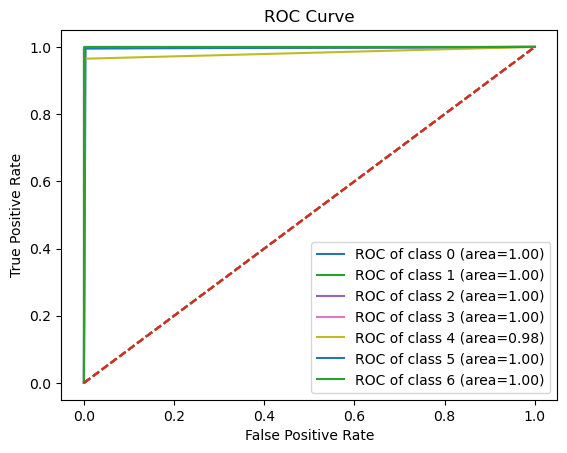

In [12]:
evaluate(svc)
print("Train: ")
plot_roc_curve(svc, X_train, y_train, n_classes=7)

Test: 


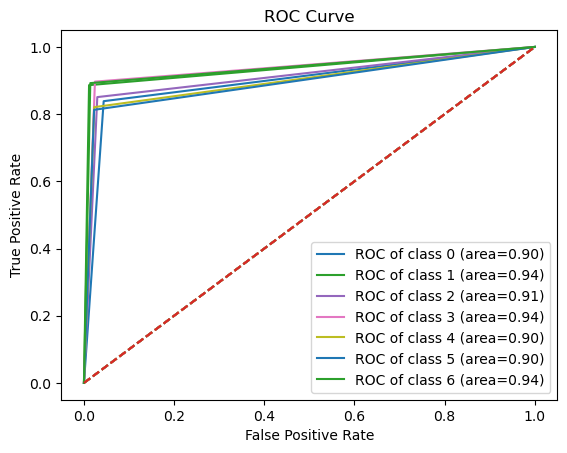

In [13]:
print("Test: ")
plot_roc_curve(svc, X_test, y_test, n_classes = 7)

#### K-Nearest Neighbors(KNN)

In [14]:
KNN = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='manhattan', algorithm='ball_tree')
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=2,
                     weights='distance')

In [15]:
evaluate(KNN)

Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       562
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       651
           4       1.00      1.00      1.00       513
           5       1.00      1.00      1.00       623
           6       1.00      1.00      1.00       629

    accuracy                           1.00      4209
   macro avg       1.00      1.00      1.00      4209
weighted avg       1.00      1.00      1.00      4209

Test: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       192
           1       0.95      0.94      0.94       167
           2       0.90      0.89      0.90       221
           3       0.91      0.94      0.93       213
           4       0.89      0.87      0.88       212
           5       0.89      0.89      0.89       203
         

Train: 


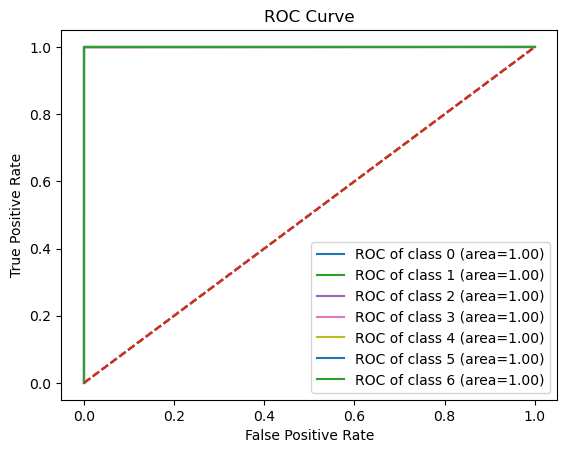

In [16]:
print("Train: ")
plot_roc_curve(KNN, X_train, y_train, n_classes = 7)

Test: 


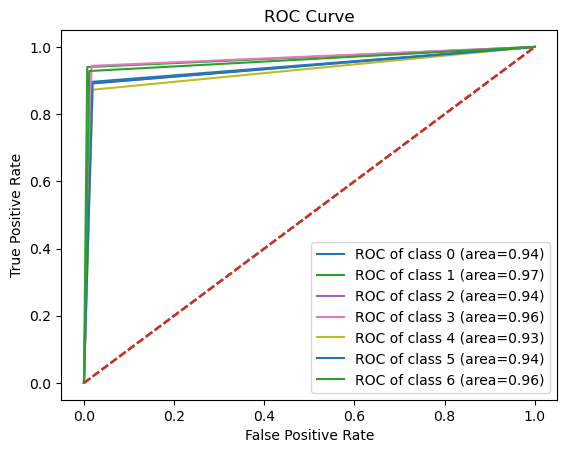

In [17]:
print("Test: ")
plot_roc_curve(KNN, X_test, y_test, n_classes = 7)

#### XGBoost

In [18]:
xgb = XGBClassifier(n_estimators=300)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
evaluate(xgb)

Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       562
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       651
           4       1.00      1.00      1.00       513
           5       1.00      1.00      1.00       623
           6       1.00      1.00      1.00       629

    accuracy                           1.00      4209
   macro avg       1.00      1.00      1.00      4209
weighted avg       1.00      1.00      1.00      4209

Test: 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       192
           1       0.88      0.84      0.86       167
           2       0.78      0.84      0.81       221
           3       0.81      0.84      0.82       213
           4       0.83      0.76      0.80       212
           5       0.81      0.78      0.80       203
         

Train: 


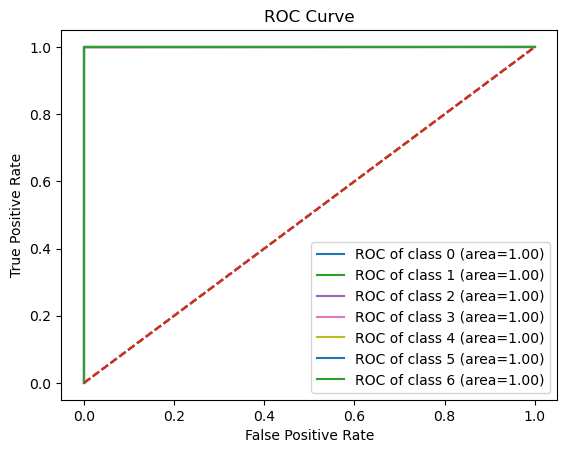

In [20]:
print("Train: ")
plot_roc_curve(xgb, X_train, y_train, n_classes = 7)

Test: 


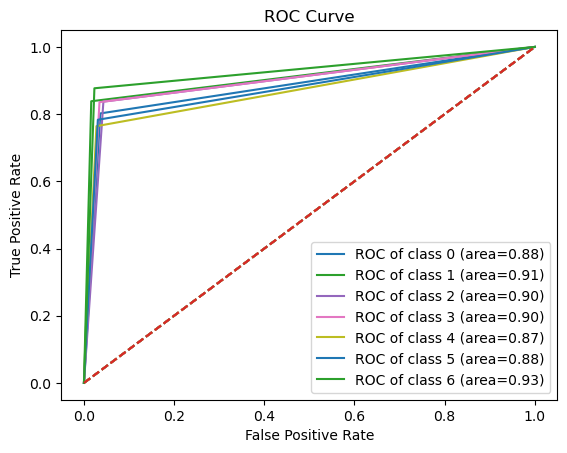

In [21]:
print("Test: ")
plot_roc_curve(xgb, X_test, y_test, n_classes = 7)

#### MLP

In [22]:
MLP = MLPClassifier(hidden_layer_sizes = (128, 64, 32, 8), batch_size = 16, solver = 'sgd', random_state=4,
                    verbose=False, momentum=0.85, max_iter=400, learning_rate_init = 0.006)
MLP.fit(X_train, y_train)

MLPClassifier(batch_size=16, hidden_layer_sizes=(128, 64, 32, 8),
              learning_rate_init=0.006, max_iter=400, momentum=0.85,
              random_state=4, solver='sgd')

In [23]:
evaluate(MLP)

Train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       1.00      1.00      1.00       562
           2       1.00      1.00      1.00       633
           3       1.00      1.00      1.00       651
           4       1.00      0.99      1.00       513
           5       0.99      1.00      0.99       623
           6       1.00      1.00      1.00       629

    accuracy                           1.00      4209
   macro avg       1.00      1.00      1.00      4209
weighted avg       1.00      1.00      1.00      4209

Test: 
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       192
           1       0.83      0.82      0.82       167
           2       0.80      0.81      0.81       221
           3       0.83      0.82      0.83       213
           4       0.85      0.78      0.81       212
           5       0.75      0.79      0.77       203
         

Train: 


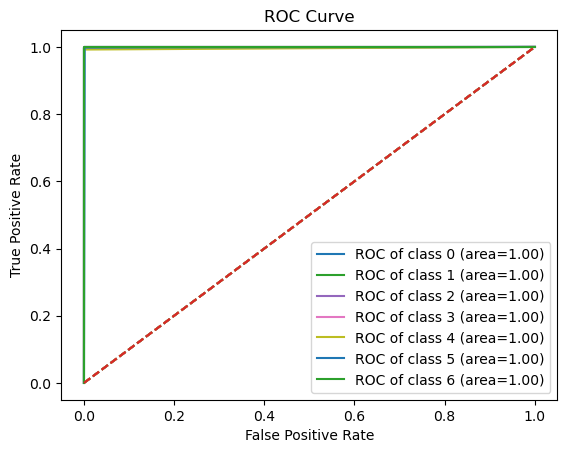

In [24]:
print("Train: ")
plot_roc_curve(MLP, X_train, y_train, n_classes = 7)

Test: 


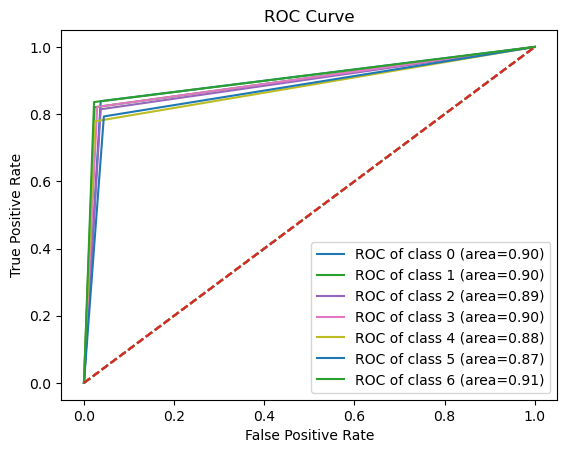

In [25]:
print("Test: ")
plot_roc_curve(MLP, X_test, y_test, n_classes = 7)

#### LSTM